# Importations 


In [1]:
from utils.utils_dq import * 
%matplotlib inline

In [2]:
def compare_q_tables_dic(dic,names = ['hot_encoding','u_hot','rewards'] , gamma = 0 , isLinear = True) : 
    n = len(dic[names[0]][3][-1])
    if isLinear : 
        title = 'Q tables for Linear model with gamma = {} after {} epochs'.format(gamma, n)
    else : 
        title = 'Q tables for Fully connected model with gamma = {} after {} epochs'.format(gamma, n)
    
    compare_q_tables([dic[x][0][-1] for x in names],names,title)
    

In [3]:
def plot_results_loss_rew_dic(dic, names = ['hot_encoding','u_hot','rewards'], rm_rew = 500, rm_loss = 500, gamma = 0 ) : 
    
    all_loss = [dic[x][3][-1] for x in dic]
    all_rewards = [dic[x][1][-1] for x in dic]
    
    param = {
    'all_loss' : all_loss, 'rewards' : all_rewards, 'names' : names,'rm_loss' : rm_loss,'rm_reward' : rm_rew,\
    'title' : 'Rewards and Loss for Linear model with gamma = ' + str(gamma) }

    plot_different_loss(**param)
    
    
    

In [4]:
def get_result_tables(param_deep_Q,dic = {}, names = ['hot_encoding','u_hot','rewards'], epochs = [1,5000], linear = True) : 
    # Get the results after 5000 epochs for the given parameters
    for x in names : 
        dic[x] = compare_conversion(x, param_deep_Q, epochs = epochs, linear = linear)
    

### Load the environment and results from q learning algorithm

In [5]:
# Load the environment 
with open('./check/env.pickle', 'rb') as f:
    env = pickle.load(f)


In [6]:
# Load the q_tables for gamma = 0 and gamma = 0.9
with open('./check/q_tables_q_learning_0.pickle', 'rb') as f:
    [q_table_q,q_table_q1] = pickle.load(f)

with open('./check/q_tables_q_learning_09.pickle', 'rb') as f:
    [q_table_q09,q_table_q109] = pickle.load(f)
    
with open('./check/q_learning_rewards_0.pickle', 'rb') as f:
    [all_reward_q0,all_reward_q10] = pickle.load(f)
    
with open('./check/q_learning_rewards_09.pickle', 'rb') as f:
    [all_reward_q09,all_reward_q109] = pickle.load(f)
    
    


In [7]:
q_table_q09_plot = q_table_q09.copy()
for i in range(q_table_q09.shape[0]) :
    q_table_q09_plot[i,i] = np.mean(q_table_q09)
    

In [8]:
tables_q_learning = [q_table_q,q_table_q1,q_table_q09,q_table_q109]

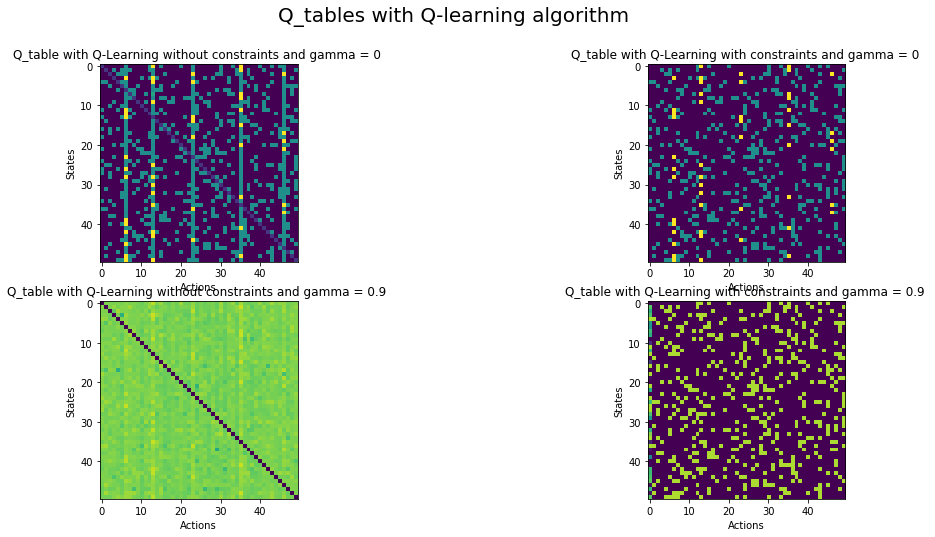

In [9]:
names = ['Q_table with Q-Learning without constraints and gamma = 0 ',\
         'Q_table with Q-Learning with constraints and gamma = 0 ' ,\
        'Q_table with Q-Learning without constraints and gamma = 0.9 ',\
         'Q_table with Q-Learning with constraints and gamma = 0.9 ' ]

f, axs = plt.subplots(2,2,figsize=(18,8))
axs = axs.reshape(-1,1)
    
for i in range(len(axs)) : 

    axs[i][0].imshow(tables_q_learning[i],cmap='viridis', vmin=0, vmax=2)
    axs[i][0].set_xlabel('Actions')
    axs[i][0].set_ylabel('States')
    axs[i][0].set_title(names[i])
        
        

plt.suptitle('Q_tables with Q-learning algorithm ', size=20)    
        
plt.show()

## Reward matrix

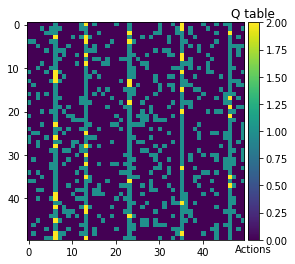

In [10]:
plot_q_table(get_matrix_rewards(env))

## Rewards

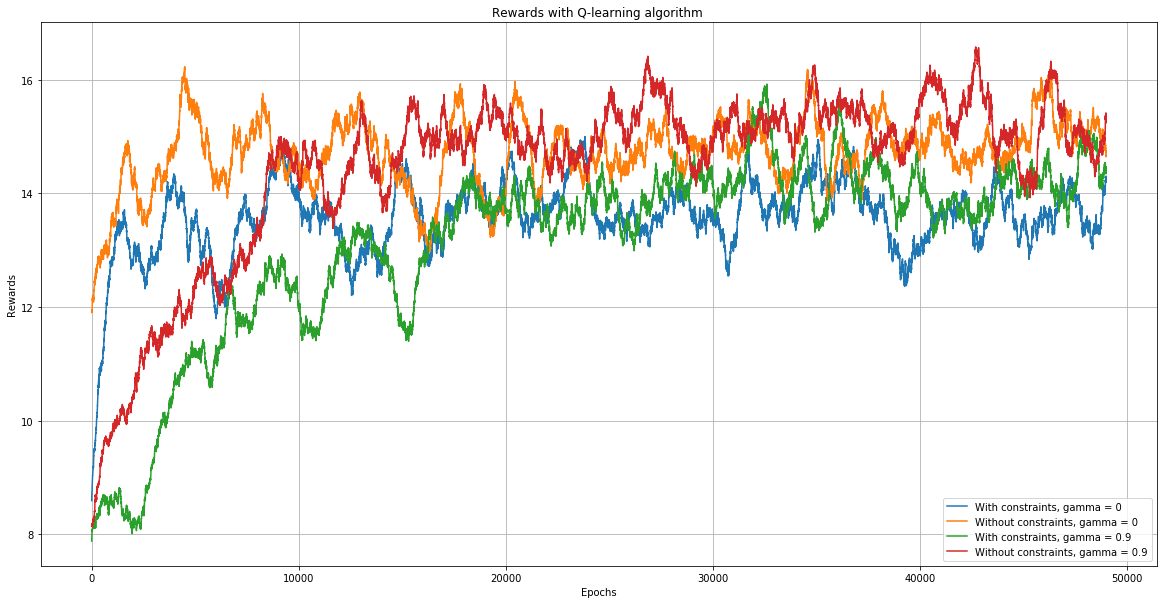

In [11]:
f, axs = plt.subplots(1,1,figsize=(20,10))

plt.plot( running_mean(all_reward_q0,1000), label ='With constraints, gamma = 0' )
plt.plot( running_mean(all_reward_q10,1000) , label ='Without constraints, gamma = 0')
plt.plot( running_mean(all_reward_q09,1000), label ='With constraints, gamma = 0.9 ' )
plt.plot( running_mean(all_reward_q109,1000) , label ='Without constraints, gamma = 0.9')

plt.xlabel('Epochs')
plt.ylabel('Rewards')
plt.title('Rewards with Q-learning algorithm ')
plt.legend()
plt.grid(True)
plt.show()


# Linear Model

In [30]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-3,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE),\
    'constraints' : False,
    'optimizer' : 'SGD'
}


In [12]:
conversion = ConversionState(env, 'valuable' ).conversion

In [13]:
q_t = np.zeros((50,50))

for i in range(50) : 
    
    q_t[i,:] = conversion(i)
    


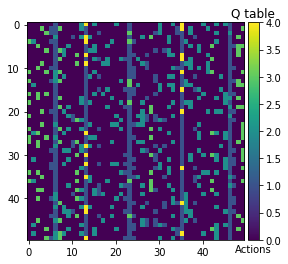

In [14]:
plot_q_table(q_t)

In [26]:
dict_results_linear =  {}
epochs = [10000]

In [31]:
epochs = [10000]

In [32]:
get_result_tables(param_deep_Q, dict_results_linear, names = ['valuable'],epochs = epochs)

Episode: 9999/10000, Reward : 4


In [37]:
dict_results_linear['valuable'][0][-1]

tensor([[-0.0346, -0.0391, -0.1397,  ..., -0.2092, -0.4037,  0.2855],
        [ 0.0088,  0.0527,  0.1013,  ...,  0.6993,  0.2845,  0.3106],
        [ 0.2588, -0.1711,  0.0920,  ..., -0.0331, -0.2020,  0.1610],
        ...,
        [-0.0070, -0.1251,  0.2729,  ..., -0.2555, -0.1681,  0.0825],
        [-0.3475, -0.3367,  0.1777,  ...,  0.3617,  0.2834, -0.1746],
        [ 0.0594,  0.2587, -0.0481,  ...,  0.1372, -0.0540, -0.1457]])

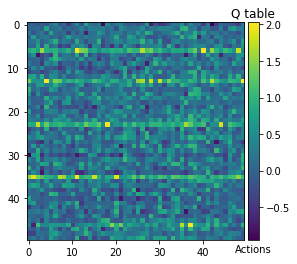

In [38]:
plot_q_table(dict_results_linear['valuable'][0][-1])

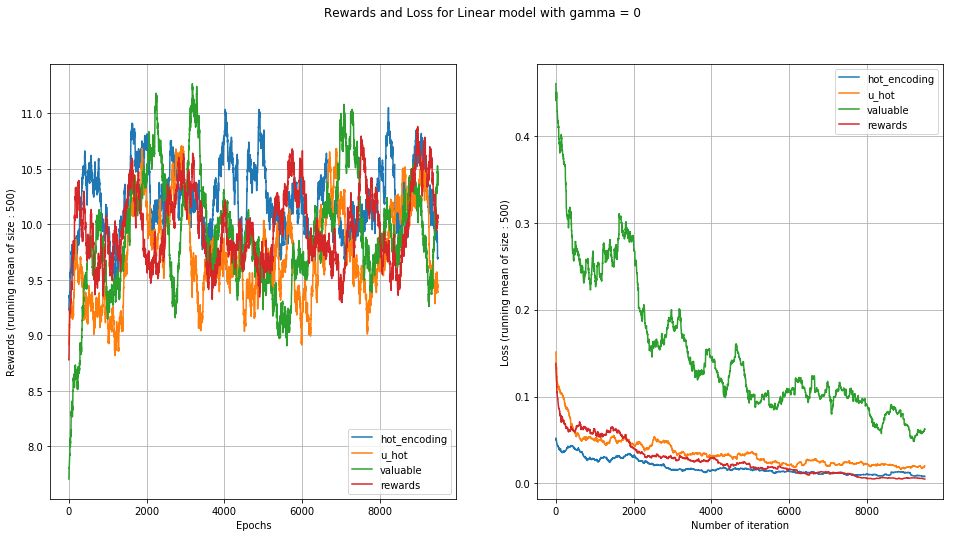

In [35]:
plot_results_loss_rew_dic(dict_results_linear, names = ['hot_encoding','u_hot','valuable','rewards'], rm_rew = 500, rm_loss = 500, gamma = 0 )

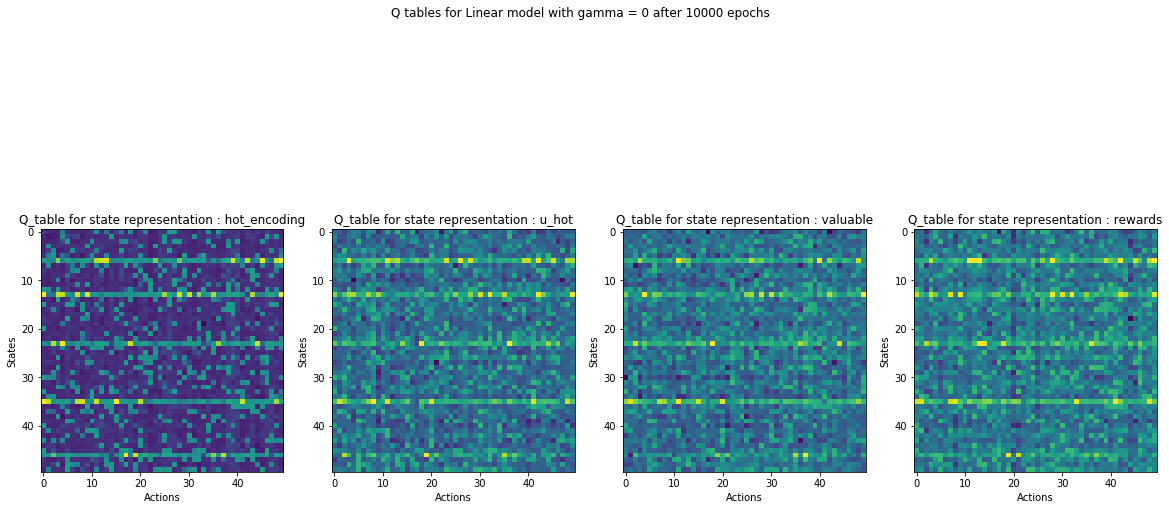

In [36]:
compare_q_tables_dic(dict_results_linear,names = ['hot_encoding','u_hot','valuable','rewards'] , gamma = 0 , isLinear = True) 

In [39]:
# with open('check/linear_gamma_0.pickle', 'wb') as f:
#     pickle.dump(dict_results_linear, f)

In [15]:
with open('./check/linear_gamma_0.pickle', 'rb') as f:
    dict_results_linear = pickle.load(f)

In [56]:
dict_results_linear_09 =  {}
epochs = [5000]

In [57]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-6,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE),\
    'constraints' : True,
    'optimizer' : 'SGD'
}


In [58]:
get_result_tables(param_deep_Q, dict_results_linear_09, names = ['hot_encoding', 'u_hot','rewards','valuable'],epochs = epochs)

Episode: 4999/5000, Reward : 1


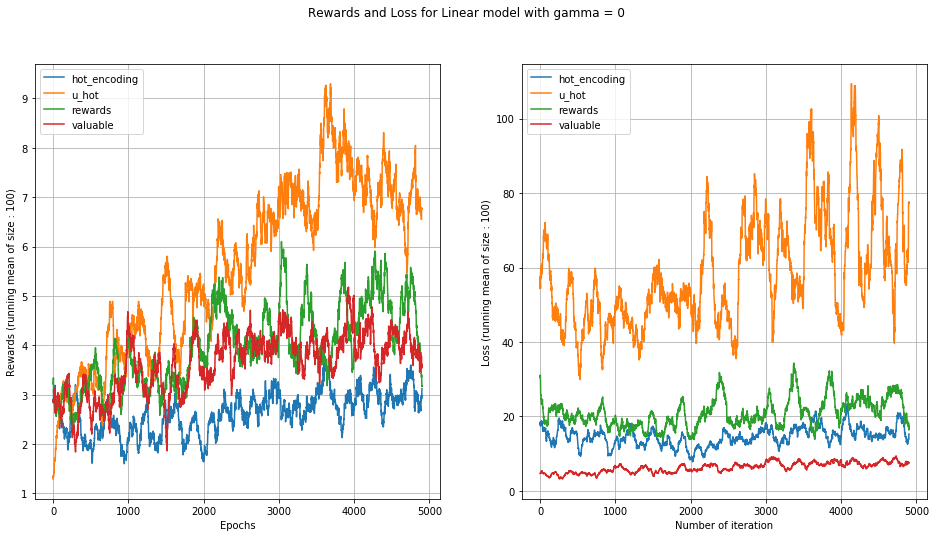

In [59]:
plot_results_loss_rew_dic(dict_results_linear_09, names = ['hot_encoding','u_hot','rewards','valuable'], rm_rew = 100, rm_loss = 100, gamma = 0 )

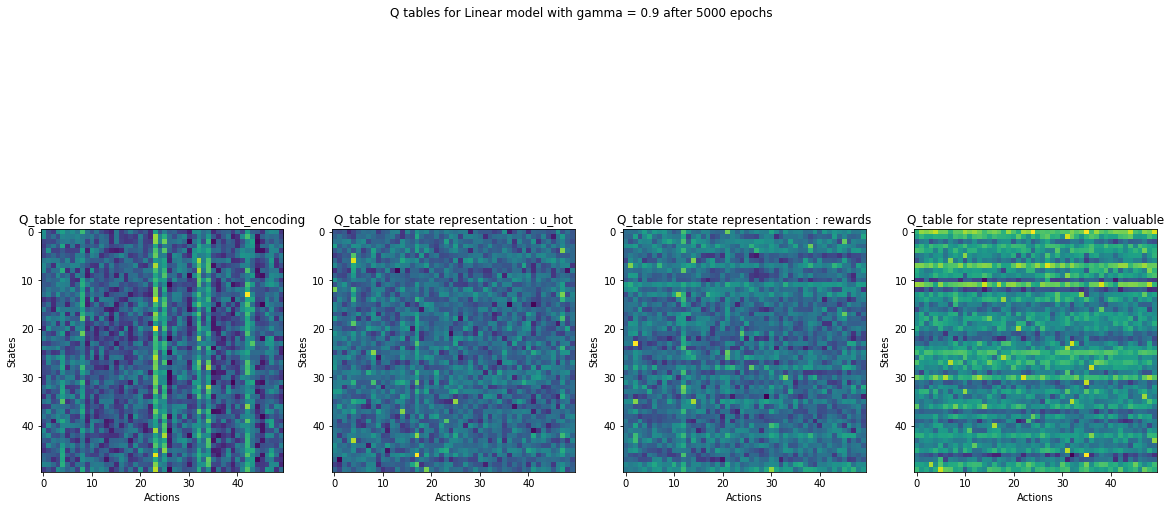

In [60]:
compare_q_tables_dic(dict_results_linear_09,names = ['hot_encoding','u_hot','rewards','valuable'] , gamma = 0.9 , isLinear = True) 

In [65]:
# with open('check/dict_results_linear_09.pickle', 'wb') as f:
#     pickle.dump(dict_results_linear_09, f)

In [63]:
bar = dict_results_linear_09['rewards'][2][-1].distribution.squeeze()

<BarContainer object of 50 artists>

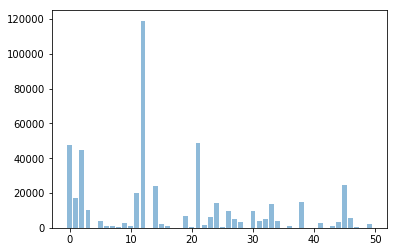

In [64]:
plt.bar(np.arange(50), bar, align='center', alpha=0.5)

# Fully connected method

## 1. Gamma = 0 and learning rate = 1e-4

In [12]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-4,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam'
}


In [13]:
dict_results_fc =  {}
epochs = [10000]

In [32]:
with open('./check/dict_results_fc.pickle', 'rb') as f:
    dict_results_fc = pickle.load(f)

In [14]:
get_result_tables(param_deep_Q, dict_results_fc, names = ['valuable', 'hot_encoding','u_hot','rewards'],epochs = epochs, linear = False)

Episode: 9999/10000, Reward : 4


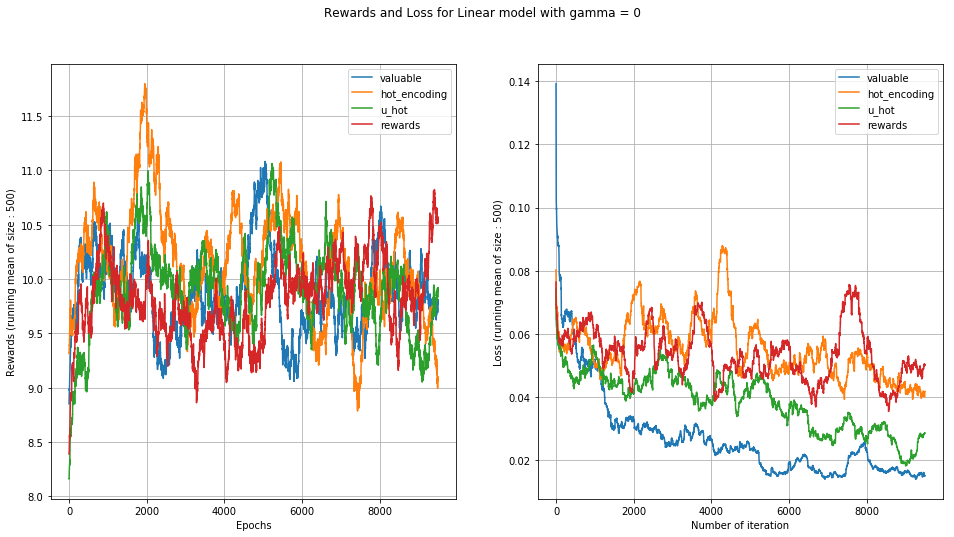

In [33]:
plot_results_loss_rew_dic(dict_results_fc, names = ['valuable', 'hot_encoding','u_hot','rewards'], rm_rew = 500, rm_loss = 500, gamma = 0 )

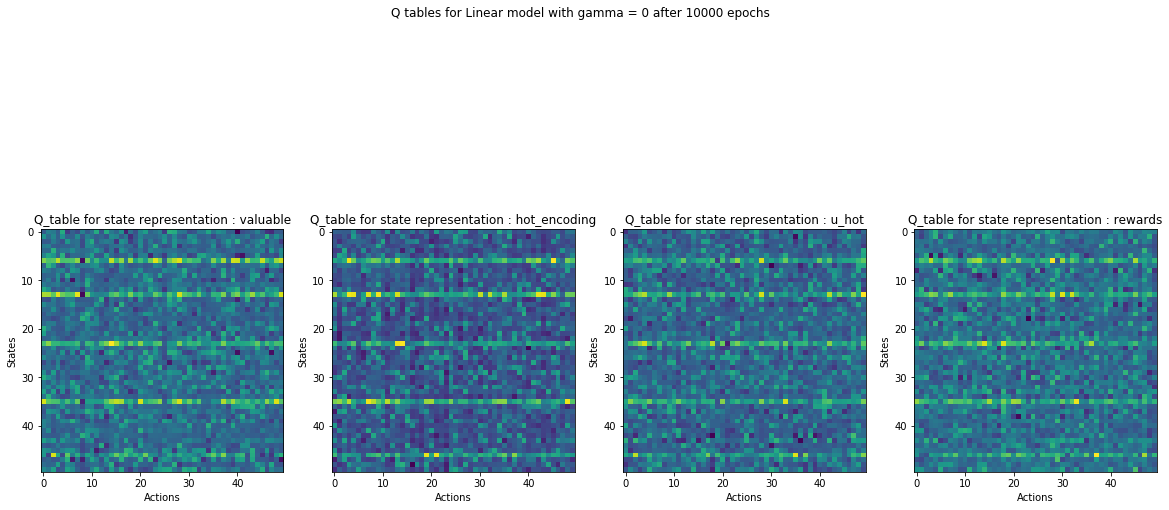

In [34]:
compare_q_tables_dic(dict_results_fc,names = ['valuable', 'hot_encoding','u_hot','rewards'] , gamma = 0 , isLinear = True) 

In [18]:
# with open('check/dict_results_fc.pickle', 'wb') as f:
#     pickle.dump(dict_results_fc, f)

## 1. Gamma = 0.9 and learning rate = 1e-4

In [ ]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-6,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam'
}


In [26]:
dict_results_fc_09 =  {}
epochs = [1000]

In [27]:
get_result_tables(param_deep_Q, dict_results_fc_09, names = ['valuable', 'hot_encoding','u_hot','rewards'],epochs = epochs, linear = False)

Episode: 999/1000, Reward : 3


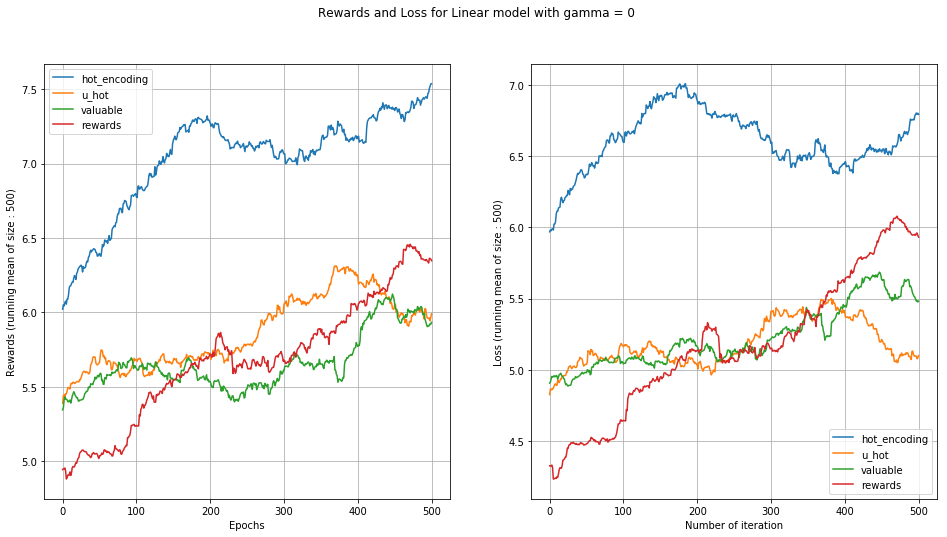

In [28]:
plot_results_loss_rew_dic(dict_results_fc_09, names = ['hot_encoding','u_hot','valuable','rewards'], rm_rew = 500, rm_loss = 500, gamma = 0 )

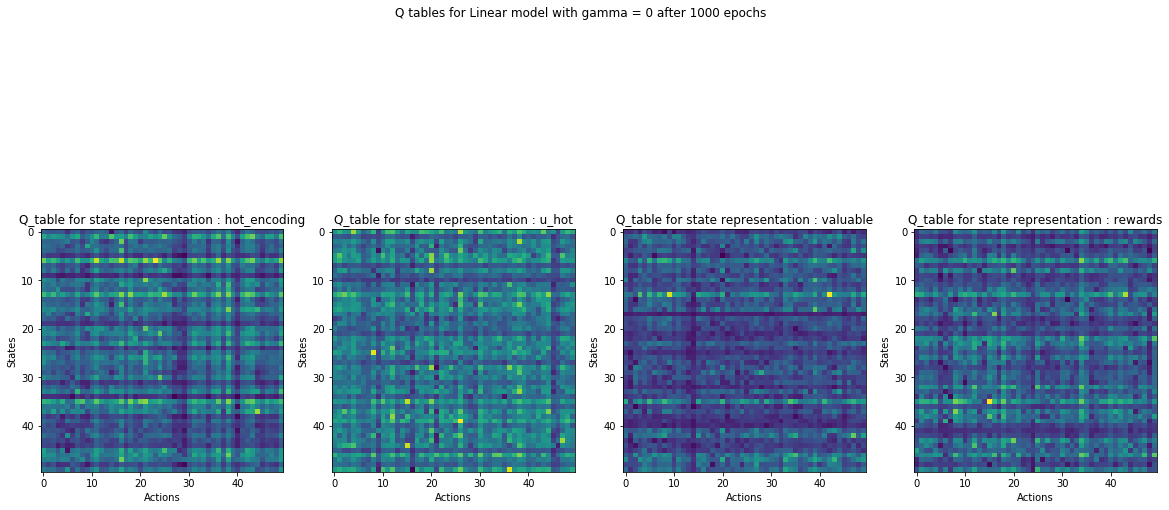

In [29]:
compare_q_tables_dic(dict_results_fc_09,names = ['hot_encoding','u_hot','valuable','rewards'] , gamma = 0 , isLinear = True) 

In [18]:
with open('check/dict_results_fc_09.pickle', 'wb') as f:
    pickle.dump(dict_results_fc_09, f)